In [6]:
# https://qiita.com/y_itoh/items/ded8e81ebc3428778e78
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import sklearn
from sklearn.decomposition import PCA

In [7]:
# 20人分のテスト得点データ
arr = np.array([[71,64,83,100,71], [34,48,67,57,68], [58,59,78,87,66], [41,51,70,60,72],
                [69,56,74,81,66], [64,65,82,100,71], [16,45,63,7,59], [59,59,78,59,62],
                [57,54,84,73,72], [46,54,71,43,62], [23,49,64,33,70], [39,48,71,29,66],
                [46,55,68,42,61], [52,56,82,67,60], [39,53,78,52,72], [23,43,63,35,59],
                [37,45,67,39,70], [52,51,74,65,69], [63,56,79,91,70], [39,49,73,64,60]])

# データフレームに変換
df = pd.DataFrame(data = arr, columns = ['数学', '理科', '社会', '英語', '国語'])

/Users/shojiro/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


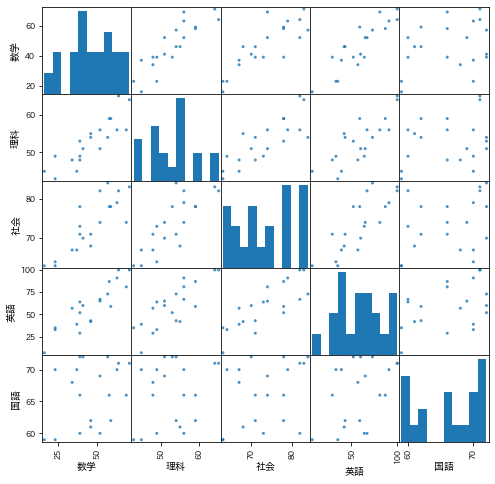

In [8]:
from pandas import plotting
import japanize_matplotlib
plotting.scatter_matrix(df, alpha=0.8, figsize=(8, 8))
plt.show()

<AxesSubplot:>

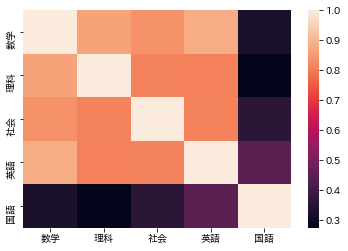

In [10]:
plt.figure()
sns.heatmap(data=df.corr())

数学と、[理科、社会、英語]に相関がある
理科と、[社会、英語]に相関がある
社会と、英語に相関がある

# 相関があるため、情報をコンパクトに圧縮できるから、主成分分析をやる

情報をなるべく失わずに次元を圧縮したい

$x = [x_1, x_2, x_3, x_4, x_5]$

第一主成分の計算
各変数に係数をつけた、各成分の値を足したもの

$z_1 = w_{11}x_1, w_{12}x_2, w_{13}x_3, w_{14}x_4, w_{15}x_5 = w_1x$

最初は、すべてに１が入っていた。
情報量が最大になる$w_1$を探す。

主成分分析では、情報=分散なので、分散が最大になるwを探す

$w_1 = [w_{11}, w_{12}, w_{13}, w_{14}, w_{15}]$

第二成分以降は、$w_1とw_2$で直行するという条件をつける

# 主成分分析を実行

In [17]:
pca = PCA()
pca.fit(df)
values = pca.transform(df)

c = []
for i in range(len(df.columns)): 
    f = "主成分" + str(i+1)
    c.append(f)
df_pca = pd.DataFrame(data = values, columns = c)

In [19]:
# 主成分は列の数と同じになる
df_pca

,主成分1,主成分2,主成分3,主成分4,主成分5
0,-49.966618,0.547666,-1.196482,-0.428035,2.348382
1,9.926685,-11.090550,0.684514,2.455972,0.229742
2,-30.623594,-3.444143,3.481305,-0.717889,1.375151
3,2.618182,-7.013491,-3.915666,2.358423,1.119804
4,-29.760641,6.518075,2.018125,7.869500,-1.099801
5,-46.503194,-4.705056,-0.210423,-2.703301,4.642823
6,62.092097,2.211325,2.313669,-2.827943,1.350430
7,-7.658629,12.979533,1.739874,-1.601486,1.130354
8,-19.269188,1.742222,-6.246595,-3.767006,-4.477194
9,14.212553,8.983804,1.550294,0.489638,1.656484


# 寄与率を計算する

In [22]:
ev_ratio = pca.explained_variance_ratio_
indx = []
df_evr = pd.DataFrame(data=ev_ratio, columns=["寄与率"], index = c)

In [23]:
df_evr

,寄与率
主成分1,0.914246
主成分2,0.047512
主成分3,0.018414
主成分4,0.012725
主成分5,0.007103


寄与率は、主成分それぞれの説明力を表す
データがもともと持っている情報量＝分散に対して、
その主成分の分散が何%にあたるかという割合

# 累積寄与率を可視化

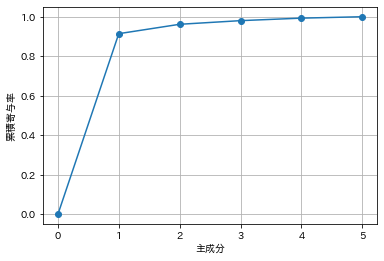

In [25]:
cc_ratio = np.cumsum(ev_ratio)
cc_ratio = np.hstack([0, cc_ratio])

plt.plot(cc_ratio, "-o")
plt.xlabel('主成分')
plt.ylabel('累積寄与率')
plt.grid()
plt.show()

# 主成分の分散を算出

In [27]:
eigen_value = pca.explained_variance_
pd.DataFrame(eigen_value, columns=['分散'], index=c)

,分散
主成分1,888.895169
主成分2,46.194367
主成分3,17.903350
主成分4,12.371821
主成分5,6.906346


# 主成分負荷量を算出

In [29]:
eigen_vector = pca.components_
pd.DataFrame(eigen_vector, columns=[df.columns], index=c)

,数学,理科,社会,英語,国語
主成分1,-0.491513,-0.173053,-0.195886,-0.827815,-0.069412
主成分2,0.755988,0.237836,0.198640,-0.525736,-0.236769
主成分3,-0.106477,0.013102,-0.227618,0.193850,-0.948211
主成分4,0.394453,-0.349259,-0.835166,0.023340,0.156133
主成分5,-0.141301,0.889569,-0.415762,-0.014170,0.125065


第一主成分: 5教科全てにマイナスの符号がついている。合計点が高いほど、主成分特典は小さくなる。英語の得点が少し違うだけで主成分得点は大きく変わる
第二主成分: 文系と理系?
第三主成分: 国語ができるかどうか

# 合計点と第一主成分の得点を比較

In [30]:
sm = np.sum(np.array(df), axis=1)

sm.reshape(len(sm), 1)

c_id = []
for i in range(len(df.index)): 
    f = "ID" + str(i+1)
    c_id.append(f)

df_sm = pd.DataFrame(sm, columns=['合計点'], index=c_id)

df_sm_rank = df_sm.sort_values('合計点', ascending=False)


df_pc1 = df_pca['主成分1']
pc1 = np.array(df_pc1)
pc1 = pc1.reshape(len(pc1), 1)
df_pca = pd.DataFrame(pc1, columns=['主成分1'], index=c_id)

df_pca_rank = df_pca.sort_values('主成分1')

In [36]:
from io import BytesIO
from IPython.display import HTML
from jinja2 import Template
# HTML出力
html_tpl = """
<table>
  <tr>
    <td>{{ table1 }}</td>
    <td>{{ table2 }}</td>
  </tr>
</table>
"""
tpl = Template(html_tpl)
html_text = tpl.render({"table1": df_sm_rank.to_html(), 
                        "table2": df_pca_rank.to_html()})

HTML(html_text)

,合計点
ID1,389
ID6,382
ID19,359
ID3,348
ID5,346
ID9,340
ID14,317
ID8,317
ID18,311
ID4,294
